# Ridge Regression
Amaç hata kareler toplamını minimize eden katsayılara bir ceza uygulayarak bulmaktır.
<ul>
  <li>Aşırı öğrenmeye karşı dirençlidir.</li>
  <li>Yanlıdır fakat varyansı düşüktür.(Bazen yanlı modelleri daha çok tercih ederiz)</li>
  <li>Çok fazla parametre olduğunda EKKya göre daha iyidir.</li>
  <li>Çok boyutluluk lanetine karşı çözüm sunar</li>
  <li>Çoklu doğrusal bağlantı problemi olduğunda etkilidir.</li>
  <li>Tüm değişkenler ile model kurar.İlgisiz değişkenleri modelden çıkaraz,katsayılaını 0a yaklaştırır.</li>
  <li>Lambda kritil roldedir.İki terimin göreceli etkilerini kontrol etmeyi sağlar.
  </li>
  <li>Lambda için iyi bir değer bulunması önemlidir.Bunun için CV yöntemi kullanılır.</li>
</ul>

In [1]:
import numpy as np
import pandas as pd

In [13]:
hitters=pd.read_csv("/Hitters.csv")
df=hitters.copy()
df[df.isnull()]
df=df.dropna()#Mising values dropped
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
from sklearn.linear_model import Ridge

In [17]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)

In [18]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

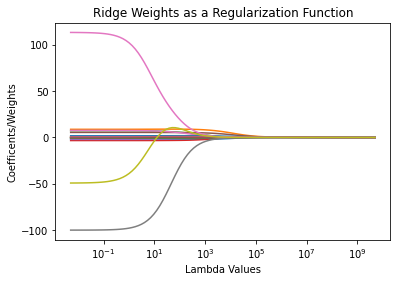

In [23]:
import matplotlib.pyplot as plt
lambdas=10**np.linspace(10,-2,100)*0.5
ridge_model=Ridge()
coefficents=[]
for i in lambdas:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train,y_train)
  coefficents.append(ridge_model.coef_)

ax=plt.gca();
ax.plot(lambdas,coefficents);
ax.set_xscale('log');

plt.xlabel('Lambda Values');
plt.ylabel('Coefficents/Weights');
plt.title('Ridge Weights as a Regularization Function');

## Prediction for Ridge Regression

In [28]:
from sklearn.metrics import mean_squared_error
y_pred=ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

357.0517922282844

## Model Tuning For Ridge Regression

In [26]:
lambdas=10**np.linspace(10,-2,100)*0.5
lambdas[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [30]:
from sklearn.linear_model import RidgeCV
ridge_CV=RidgeCV(alphas=lambdas,
                 scoring='neg_mean_squared_error',
                 normalize=True)
ridge_CV.fit(X_train,y_train)
ridge_CV.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.7599555414764666

In [32]:
ridge_tuned=Ridge(alpha=ridge_CV.alpha_,
                  normalize=True).fit(X_train,y_train)
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


386.6826429756415

#Lasso Regression
Amaç hata kareler toplamını minimize eden katsayıları bir ceza uygulayarak bulmaktır.

<ul>
<li>Ridge regresyonunun ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmitir.</li>
<li>Lassoda katsayıları sıfıra yaklaştırır</li>
<li>Fakat L1 normu lambda yeteri kadar büyük olduğunda bazı katsayıları 0 yapar.Böylece değişken seçim yapmış olur.</li>
<li>Lambdanın doğru seçilmesi çok önemlidir,burada da CV kullanılır.</li>
</ul>

In [34]:
hitters=pd.read_csv("/Hitters.csv")
df=hitters.copy()
df[df.isnull()]
df=df.dropna()#Mising values dropped
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [36]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1).fit(X_train,y_train)
lasso_model.coef_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

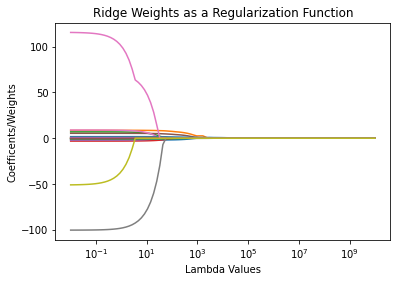

In [37]:
import matplotlib.pyplot as plt
lambdas=10**np.linspace(10,-2,100)*0.5
lasso_model=Lasso()
coefficents=[]
for i in lambdas:
  lasso_model.set_params(alpha=i)
  lasso_model.fit(X_train,y_train)
  coefficents.append(lasso_model.coef_)

ax=plt.gca();
ax.plot(lambdas*2,coefficents);
ax.set_xscale('log');
plt.axis('tight');
plt.xlabel('Lambda Values');
plt.ylabel('Coefficents/Weights');
plt.title('Lasso Weights as a Regularization Function');

#Lasso Prediction

In [39]:
y_preds=lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

386.6826429756415

#Model Tuning For Lasso Regression Model

In [41]:
from sklearn.linear_model import LassoCV
lasso_CV=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lasso_CV.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=10, max_iter=10000, normalize=True)

In [42]:
lasso_CV.alpha_

0.39406126432470073

In [43]:
lasso_tuned=Lasso(alpha=lasso_CV.alpha_)
lasso_tuned.fit(X_train,y_train)
y_preds=lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_preds))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.253e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


356.5226376958366